# EDA CASE STUDY

In [1]:
# Importing required libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns


In [2]:
#Reading the datas:

inp_a = pd.read_csv("application_data.csv")
inp_pa= pd.read_csv("previous_application.csv")

In [3]:
# Examining the data:
inp_a.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
inp_pa.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Checking the number of rows and columns in the dataframe
inp_a.shape


(307511, 122)

In [6]:
inp_pa.shape

(1670214, 37)

In [7]:
# Check the column-wise info of the dataframe
inp_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
inp_pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [9]:
# Checking the summary for the numeric columns:

inp_a.describe()



,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [10]:
inp_pa.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [11]:
# Checking missing valves:


In [12]:
inp_a[inp_a.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Looks like large amount of values are missing

In [13]:
# Finding the percentage of the nullvalues


In [14]:
nul_val_per = round(100*inp_a.isnull().sum()/len(inp_a),2)
nul_val_per

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

In [15]:
# checking columns having null values more than or equal to 50%
nul_val_50 = nul_val_per[nul_val_per>=50]
nul_val_50


OWN_CAR_AGE                 65.99
EXT_SOURCE_1                56.38
APARTMENTS_AVG              50.75
BASEMENTAREA_AVG            58.52
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
ELEVATORS_AVG               53.30
ENTRANCES_AVG               50.35
FLOORSMIN_AVG               67.85
LANDAREA_AVG                59.38
LIVINGAPARTMENTS_AVG        68.35
LIVINGAREA_AVG              50.19
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAREA_AVG           55.18
APARTMENTS_MODE             50.75
BASEMENTAREA_MODE           58.52
YEARS_BUILD_MODE            66.50
COMMONAREA_MODE             69.87
ELEVATORS_MODE              53.30
ENTRANCES_MODE              50.35
FLOORSMIN_MODE              67.85
LANDAREA_MODE               59.38
LIVINGAPARTMENTS_MODE       68.35
LIVINGAREA_MODE             50.19
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAREA_MODE          55.18
APARTMENTS_MEDI             50.75
BASEMENTAREA_MEDI           58.52
YEARS_BUILD_MEDI            66.50
COMMONAREA_MED

In [16]:
#checking shape
nul_val_50.shape

(41,)

In [17]:
#dropping Null values colums have null value more than 50%

inp_a1 = inp_a.drop(columns=nul_val_50.index)

In [18]:
inp_a1.shape

(307511, 81)

In [19]:
# Checking the columns having less null percentage

inp_a1.isnull().sum()/len(inp_a1)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 81, dtype: float64

In [20]:
# Checking null value  low percentage columns 
low_nul_val = nul_val_per[(nul_val_per<=15) & (nul_val_per>0)].sort_values(ascending=False)
low_nul_val

AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
DEF_60_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
dtype: float64

In [21]:
low_nul_val.shape

(13,)

In [22]:
#Checking the datas having null value percentage

In [23]:
inp_a1[['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON',
        'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','NAME_TYPE_SUITE',
        'DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE'
       ,'EXT_SOURCE_2','AMT_GOODS_PRICE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 13 columns):
AMT_REQ_CREDIT_BUREAU_YEAR    265992 non-null float64
AMT_REQ_CREDIT_BUREAU_QRT     265992 non-null float64
AMT_REQ_CREDIT_BUREAU_MON     265992 non-null float64
AMT_REQ_CREDIT_BUREAU_WEEK    265992 non-null float64
AMT_REQ_CREDIT_BUREAU_DAY     265992 non-null float64
AMT_REQ_CREDIT_BUREAU_HOUR    265992 non-null float64
NAME_TYPE_SUITE               306219 non-null object
DEF_60_CNT_SOCIAL_CIRCLE      306490 non-null float64
OBS_60_CNT_SOCIAL_CIRCLE      306490 non-null float64
DEF_30_CNT_SOCIAL_CIRCLE      306490 non-null float64
OBS_30_CNT_SOCIAL_CIRCLE      306490 non-null float64
EXT_SOURCE_2                  306851 non-null float64
AMT_GOODS_PRICE               307233 non-null float64
dtypes: float64(12), object(1)
memory usage: 30.5+ MB


In [24]:
inp_a1[['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON',
        'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','NAME_TYPE_SUITE',
        'DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE'
       ,'EXT_SOURCE_2','AMT_GOODS_PRICE']]

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,NAME_TYPE_SUITE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE
0,1.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,2.0,2.0,2.0,2.0,0.262949,351000.0
1,0.0,0.0,0.0,0.0,0.0,0.0,Family,0.0,1.0,0.0,1.0,0.622246,1129500.0
2,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.555912,135000.0
3,NaN,NaN,NaN,NaN,NaN,NaN,Unaccompanied,0.0,2.0,0.0,2.0,0.650442,297000.0
4,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.322738,513000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,NaN,NaN,NaN,NaN,NaN,NaN,Unaccompanied,0.0,0.0,0.0,0.0,0.681632,225000.0
307507,NaN,NaN,NaN,NaN,NaN,NaN,Unaccompanied,0.0,0.0,0.0,0.0,0.115992,225000.0
307508,1.0,0.0,1.0,0.0,0.0,1.0,Unaccompanied,0.0,6.0,0.0,6.0,0.535722,585000.0
307509,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.514163,319500.0


In [25]:
# Checking the values count of each coulms:


In [26]:
inp_a1.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [27]:
inp_a1.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()


0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [28]:
inp_a1.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [29]:
inp_a1.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [30]:
inp_a1.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [31]:
inp_a1.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [32]:
inp_a1.DEF_60_CNT_SOCIAL_CIRCLE.value_counts()

0.0     280721
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
24.0         1
7.0          1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [33]:
inp_a1.DEF_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
8.0          1
34.0         1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [34]:
inp_a1.OBS_60_CNT_SOCIAL_CIRCLE.value_counts()

0.0      164666
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
27.0          5
29.0          2
28.0          1
344.0         1
47.0          1
26.0          1
30.0          1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [35]:
inp_a1.OBS_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
24.0         11
25.0         11
27.0          5
26.0          3
30.0          2
28.0          1
348.0         1
29.0          1
47.0          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

# The above colums sees like having varible having days, hours, week, etc. we can fill the null value with 0 here 

In [36]:
inp_a1.AMT_GOODS_PRICE.value_counts()

450000.0    26022
225000.0    25282
675000.0    24962
900000.0    15416
270000.0    11428
            ...  
705892.5        1
442062.0        1
353641.5        1
353749.5        1
738945.0        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [37]:
# Filling amout with mean(Average price):

mean=inp_a1['AMT_GOODS_PRICE'].mean()

inp_a1.loc[inp_a1['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']=mean




In [38]:
inp_a1['AMT_GOODS_PRICE'].isnull().sum()


0

In [39]:
# Checking the columns:

In [40]:
inp_a1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [41]:
inp_a1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
inp_a1.shape

(307511, 81)

In [43]:
#Dropping the un necessary columns for further analysis:

Unnecssary_columns=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 
        'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
        'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
        'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
        'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'
        ,'NAME_TYPE_SUITE','EXT_SOURCE_2','EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG',
        'YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE',
        'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
        'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
        'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE']

inp_a1.drop(labels=Unnecssary_columns,axis=1,inplace=True)


In [44]:
inp_a1.shape

(307511, 30)

In [45]:
inp_a1.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
R

In [46]:
#Checking the column detail of the OCCUPATION_TYPE
inp_a1.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [47]:
inp_a1.OCCUPATION_TYPE.isnull().sum()

96391

In [48]:
## Large amount of data is missing here, so i think we shoud dropping  the null rows for better analysis

In [49]:
# Checking AMT_ANNUITY column

In [50]:
inp_a1.AMT_ANNUITY.value_counts()

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
15210.0       1
50265.0       1
73012.5       1
40558.5       1
4437.0        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

In [51]:
inp_a1.AMT_ANNUITY.isnull().sum()

12

In [52]:
# Filling AMT_ANNUITY with median

In [53]:
mode1=inp_a1['AMT_ANNUITY'].median()

inp_a1.loc[inp_a1['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=mode1

In [54]:
inp_a1.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
R

## Now data looks ok to analyse

In [55]:
#We have noticed that some columns have negative values,which is not not possible
# Lets explore those datas and try to correct it 
inp_a1[['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-9461,-637,-3648.0,-2120
1,-16765,-1188,-1186.0,-291
2,-19046,-225,-4260.0,-2531
3,-19005,-3039,-9833.0,-2437
4,-19932,-3038,-4311.0,-3458
...,...,...,...,...
307506,-9327,-236,-8456.0,-1982
307507,-20775,365243,-4388.0,-4090
307508,-14966,-7921,-6737.0,-5150
307509,-11961,-4786,-2562.0,-931


In [56]:
# correcting the data By converting the days into year

In [57]:
neg_cols = ['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']
inp_a1[neg_cols] = inp_a1[neg_cols].abs()
inp_a1[neg_cols] = inp_a1[neg_cols]/365

In [58]:
inp_a1[['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,25.920548,1.745205,9.994521,5.808219
1,45.931507,3.254795,3.249315,0.797260
2,52.180822,0.616438,11.671233,6.934247
3,52.068493,8.326027,26.939726,6.676712
4,54.608219,8.323288,11.810959,9.473973
...,...,...,...,...
307506,25.553425,0.646575,23.167123,5.430137
307507,56.917808,1000.665753,12.021918,11.205479
307508,41.002740,21.701370,18.457534,14.109589
307509,32.769863,13.112329,7.019178,2.550685


In [59]:
# We will check for object data type varialble in gender column


In [60]:
inp_a1.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [61]:
# we can see that F count is much more than M so we can replace this XNA calue with value = F

In [62]:
inp_a1.loc[inp_a1.CODE_GENDER=='XNA', 'CODE_GENDER'] = 'F'
inp_a1['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [63]:
#Now we will check the'AMT_INCOME_TOTAL' and 'AMT_CREDIT' variables
inp_a1[['AMT_INCOME_TOTAL', 'AMT_CREDIT']].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT
count,3.075110e+05,3.075110e+05
mean,1.687979e+05,5.990260e+05
std,2.371231e+05,4.024908e+05
min,2.565000e+04,4.500000e+04
25%,1.125000e+05,2.700000e+05
50%,1.471500e+05,5.135310e+05
75%,2.025000e+05,8.086500e+05
max,1.170000e+08,4.050000e+06


In [64]:
# Now Creating bins for  'AMT_INCOME_TOTAL' and 'AMT_CREDIT' for better understanding

In [65]:
# Bins for AMT_INCOME_RANGE
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,
        375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', 
        '150000-175000','175000-200000','200000-225000','225000-250000','250000-275000','275000-300000',
        '300000-325000','325000-350000','350000-375000','375000-400000','400000-425000','425000-450000',
        '450000-475000','475000-500000','>500000']

inp_a1['AMT_INCOME_RANGE']=pd.cut(inp_a1['AMT_INCOME_TOTAL'],bins,labels=slot)

In [66]:
# Creating bins for AMT_CREDIT_RANGE

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,
        700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','>900000']

inp_a1['AMT_CREDIT_RANGE']=pd.cut(inp_a1['AMT_CREDIT'],bins=bins,labels=slots)

In [67]:
inp_a1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,10,0,0,0,0,0,0,Business Entity Type 3,200000-225000,400000-450000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,11,0,0,0,0,0,0,School,250000-275000,>900000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,9,0,0,0,0,0,0,Government,50000-75000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,17,0,0,0,0,0,0,Business Entity Type 3,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,11,0,0,0,0,1,1,Religion,100000-125000,500000-550000


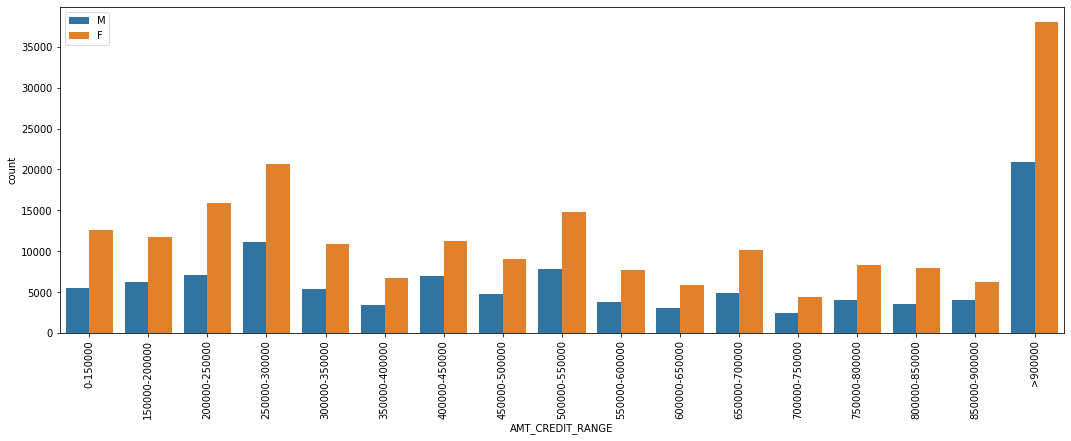

In [68]:
# Plotting countplot 

plt.figure(figsize=(18,6)) 
sns.countplot(data=inp_a1,x='AMT_CREDIT_RANGE', hue='CODE_GENDER')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [69]:

# Count of female is more than male
# Female credit range is max at >900000

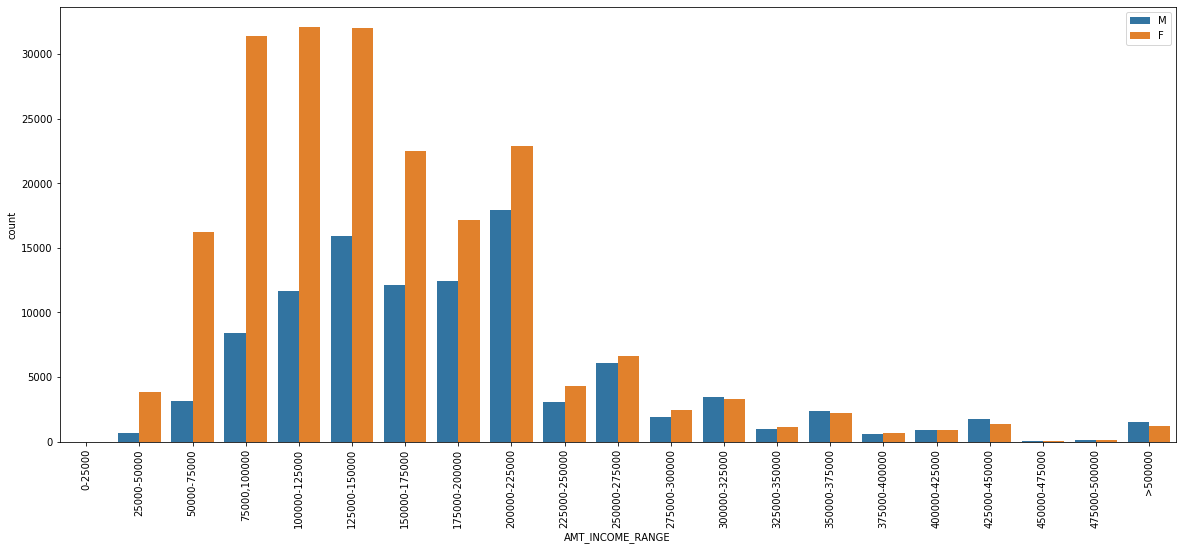

In [70]:
# Plotting countplot 

plt.figure(figsize=(20,8)) 
sns.countplot(data=inp_a1,x='AMT_INCOME_RANGE', hue='CODE_GENDER')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [71]:
# Income of the Female workers are higher in 75000 to 225000
#Most of the employes lies in the salary range of 75000 to 225000



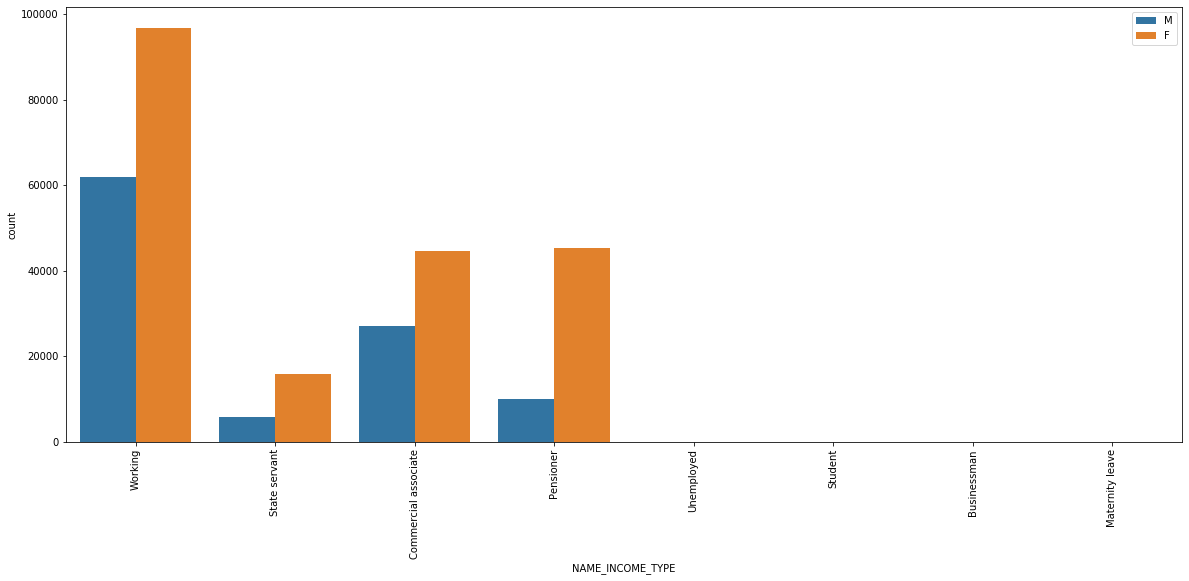

In [72]:
# Plotting countplot for INCOME_TYPE

plt.figure(figsize=(20,8)) 
sns.countplot(data=inp_a1,x='NAME_INCOME_TYPE', hue='CODE_GENDER')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [73]:
# Females workers  are much more than male workers

## Checking for Outliers in Univariate Analysis


In [74]:
inp_a1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383962e+05,0.020868,43.936973,185.547239,13.660604,8.203294,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692794e+05,0.013831,11.956133,382.037676,9.651743,4.135481,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,20.517808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,34.008219,2.556164,5.506849,4.712329,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,43.150685,6.079452,12.339726,8.915068,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,53.923288,15.635616,20.491781,11.778082,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,69.120548,1000.665753,67.594521,19.717808,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


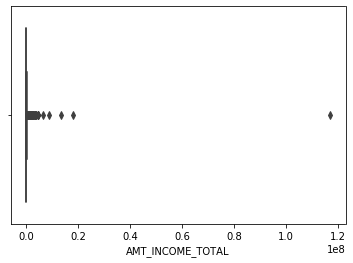

In [75]:
#Creating box plot for AMT_INCOME_TOTAL
#This graph shows the income of the indivuduals.
sns.boxplot(inp_a1['AMT_INCOME_TOTAL']);

#as we can see from the plot there is value which is too high compared to others.
# it is an outlier


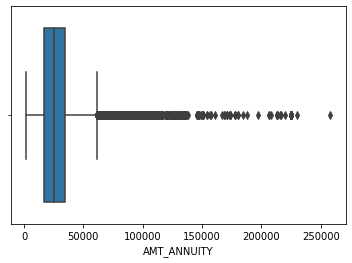

In [76]:
##Creating box plot for AMT_ANNUITY
sns.boxplot(inp_a1.AMT_ANNUITY);


In [77]:
#Excluding values outside 99%ile in each of the variables

inp_a1=inp_a1[inp_a1.AMT_ANNUITY<np.nanpercentile(inp_a1['AMT_ANNUITY'], 99)]

inp_a1=inp_a1[inp_a1.AMT_INCOME_TOTAL<np.nanpercentile(inp_a1['AMT_INCOME_TOTAL'], 99)]

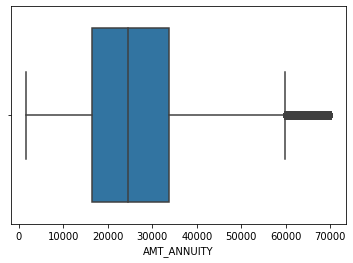

In [78]:
# Checking Again
sns.boxplot(inp_a1.AMT_ANNUITY);


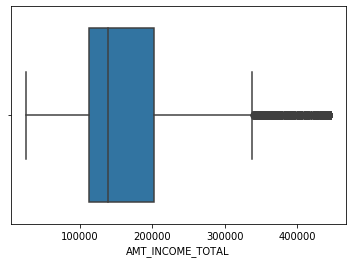

In [79]:
sns.boxplot(inp_a1['AMT_INCOME_TOTAL']);

# Checking the Imalance


In [80]:
# Seperating the dataset into two parts i.e  target1(client with payment difficulties) and target0(all other)

target0=inp_a1.loc[inp_a1["TARGET"]==0]
target1=inp_a1.loc[inp_a1["TARGET"]==1]


In [81]:
target0.shape

(275062, 32)

In [82]:
target1.shape

(24414, 32)

In [83]:
# Calculating Imbalance percentage
    
# Since the majority is target0 and minority is target1

round(len(target0)/len(target1),2)
# We can see that the Application data has high imbalance with Defaulted population at 11.27%

11.27

### Unordered Categorical Variables


In [84]:
def count_plot_func(var):
    plt.figure(figsize=(20,8))
    plt.subplot(1, 2, 1)
    
    sns.countplot(var, data=target0)
    plt.title('Distribution of NAME_CONTRACT_TYPE for Non-Defaulters', fontsize=10)
    plt.xlabel(var)
    plt.ylabel('Number of cases for non-defaulters')
    plt.subplot(1, 2, 2)
    
    sns.countplot(var, data=target1)
    plt.title('Distribution of NAME_CONTRACT_TYPE for Defaulters', fontsize=10)
    
    plt.xlabel(var)
    plt.ylabel('Number of cases for defaulters')
    plt.show()

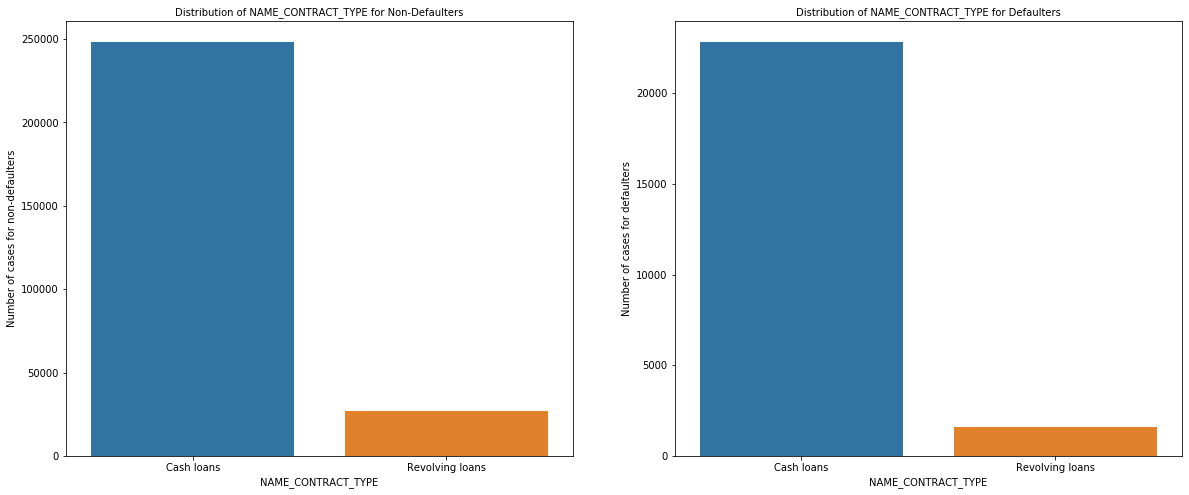

In [85]:
count_plot_func('NAME_CONTRACT_TYPE');

In [86]:
# Revolving loan are lesser in Defaulter as compare to Non drfaulter


In [87]:
def count_plot_func1(var):
    plt.figure(figsize=(20,8))
    plt.subplot(1, 2, 1)
    
    sns.countplot(var, data=target0)
    plt.title('Distribution of NAME_FAMILY_STATUS for Non-Defaulters', fontsize=10)
    plt.xlabel(var)
    plt.ylabel('Number of cases for non-defaulters')
    plt.subplot(1, 2, 2)
    
    sns.countplot(var, data=target1)
    plt.title('Distribution of NAME_FAMILY_STATUS for Defaulters', fontsize=10)
    
    plt.xlabel(var)
    plt.ylabel('Number of cases for defaulters')
    plt.show()

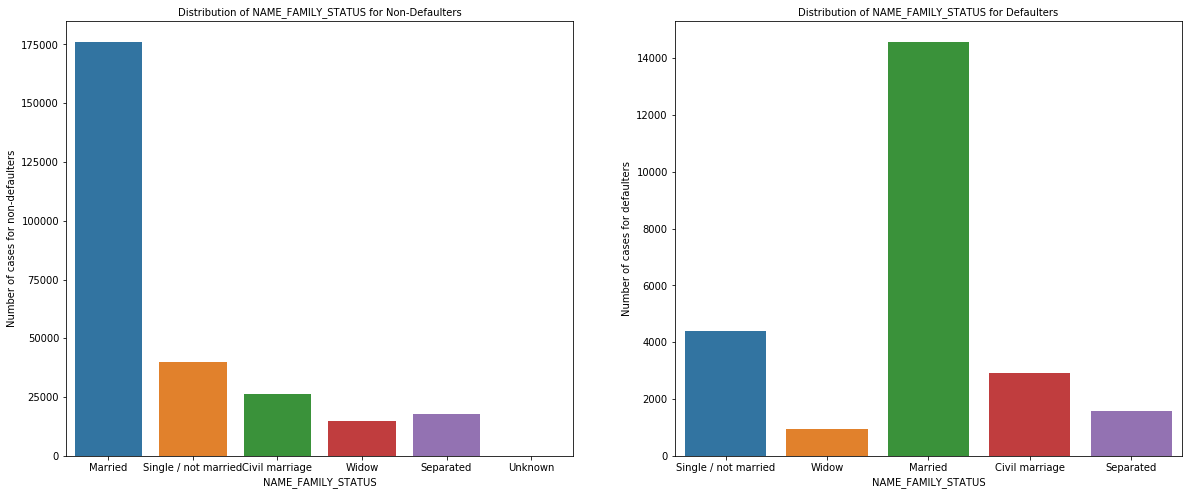

In [88]:
count_plot_func1('NAME_FAMILY_STATUS');

In [89]:
# Single or Not married  are higher in default list as compared to non default list
# In Defaulters plot Married clients are more defaulters when compared to others
# Widow Defaulters are less when compared to Widow Non Defaulters


In [90]:
def count_plot_func2(var):
    plt.figure(figsize=(20,8))
    plt.subplot(1, 2, 1)
    
    sns.countplot(var, data=target0)
    plt.title('Distribution of NAME_INCOME_TYPE for Non-Defaulters', fontsize=10)
    plt.xlabel(var)
    plt.ylabel('Number of cases for non-defaulters')
    plt.subplot(1, 2, 2)
    
    sns.countplot(var, data=target1)
    plt.title('Distribution of NAME_INCOME_TYPES for Defaulters', fontsize=10)
    
    plt.xlabel(var)
    plt.ylabel('Number of cases for defaulters')
    plt.show()

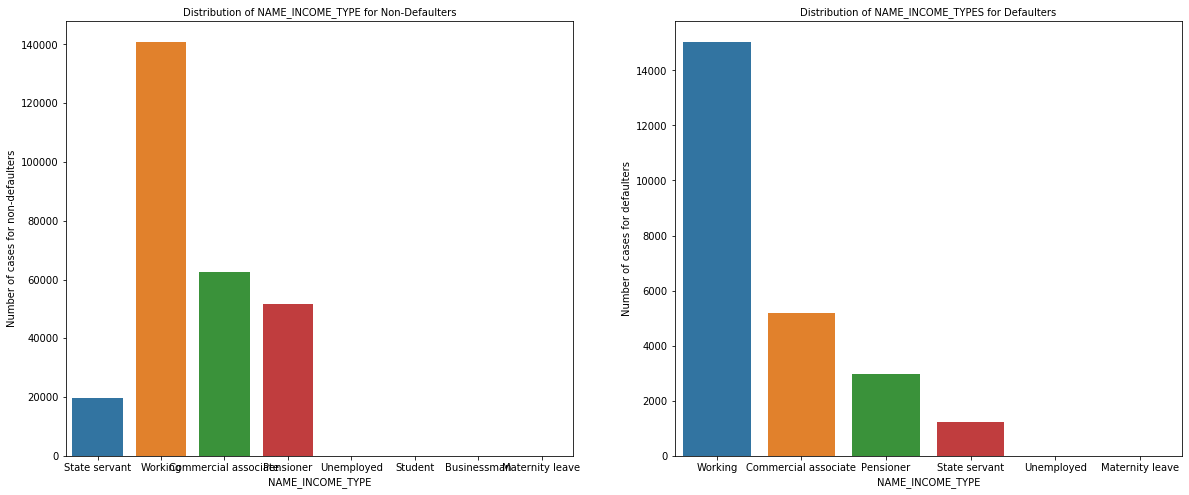

In [91]:
count_plot_func2('NAME_INCOME_TYPE')

In [92]:
# Commercial associates are comaretively less in defaulter list as compare to Non defaulter list
# Pensioners are comaretively less in defaulter list as compare to Non defaulter list

In [93]:
def count_plot_func3(var):
    plt.figure(figsize=(20,8))
    plt.subplot(1, 2, 1)
    
    sns.countplot(var, data=target0)
    plt.title('Distribution of NAME_EDUCATION_TYPE for Non-Defaulters', fontsize=10)
    plt.xlabel(var)
    plt.ylabel('Number of cases for non-defaulters')
    plt.subplot(1, 2, 2)
    
    sns.countplot(var, data=target1)
    plt.title('Distribution of NAME_EDUCATION_TYPE for Defaulters', fontsize=10)
    
    plt.xlabel(var)
    plt.ylabel('Number of cases for defaulters')
    plt.show()

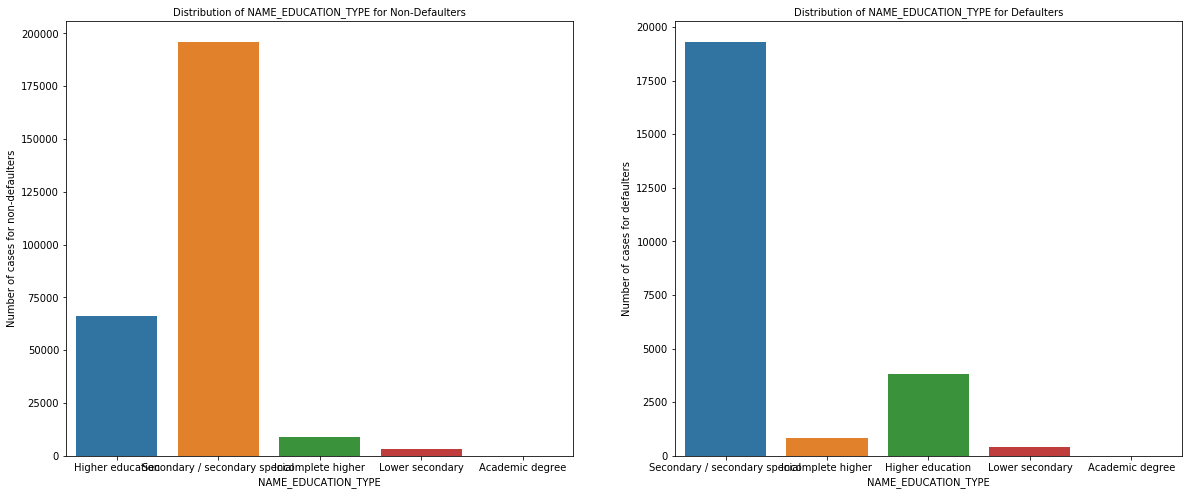

In [94]:
count_plot_func3('NAME_EDUCATION_TYPE')

In [95]:
# Higher Educated peoples are less defaulters

In [96]:
# Count plotting in logarithmic scale

def plot(inp_a1,col,title,hue =None):
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(inp_a1[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.title(title)
    ax = sns.countplot(data = inp_a1, x= col, order=inp_a1[col].value_counts().index,hue = hue,) 
        
    plt.show()

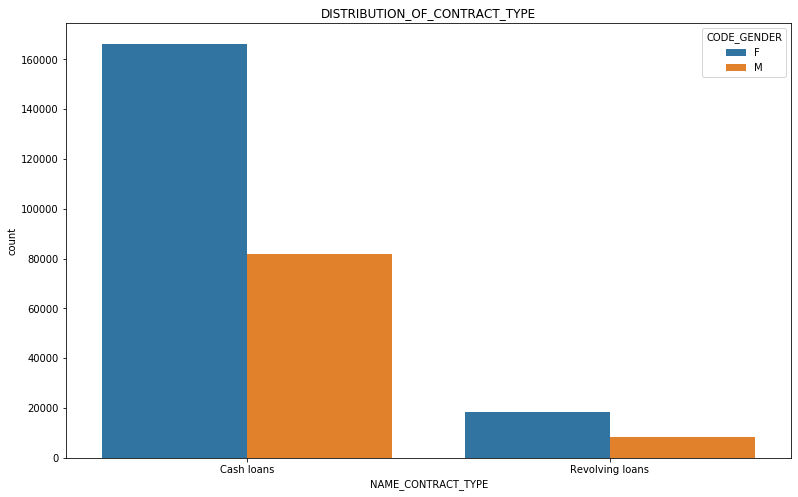

In [97]:
# Plotting for Contract type
plot(target0,col='NAME_CONTRACT_TYPE',title='DISTRIBUTION_OF_CONTRACT_TYPE',hue='CODE_GENDER')

In [98]:
# From above graph Female count is more than Male count
# Cash loans having higher density as compared to Resolving Loans

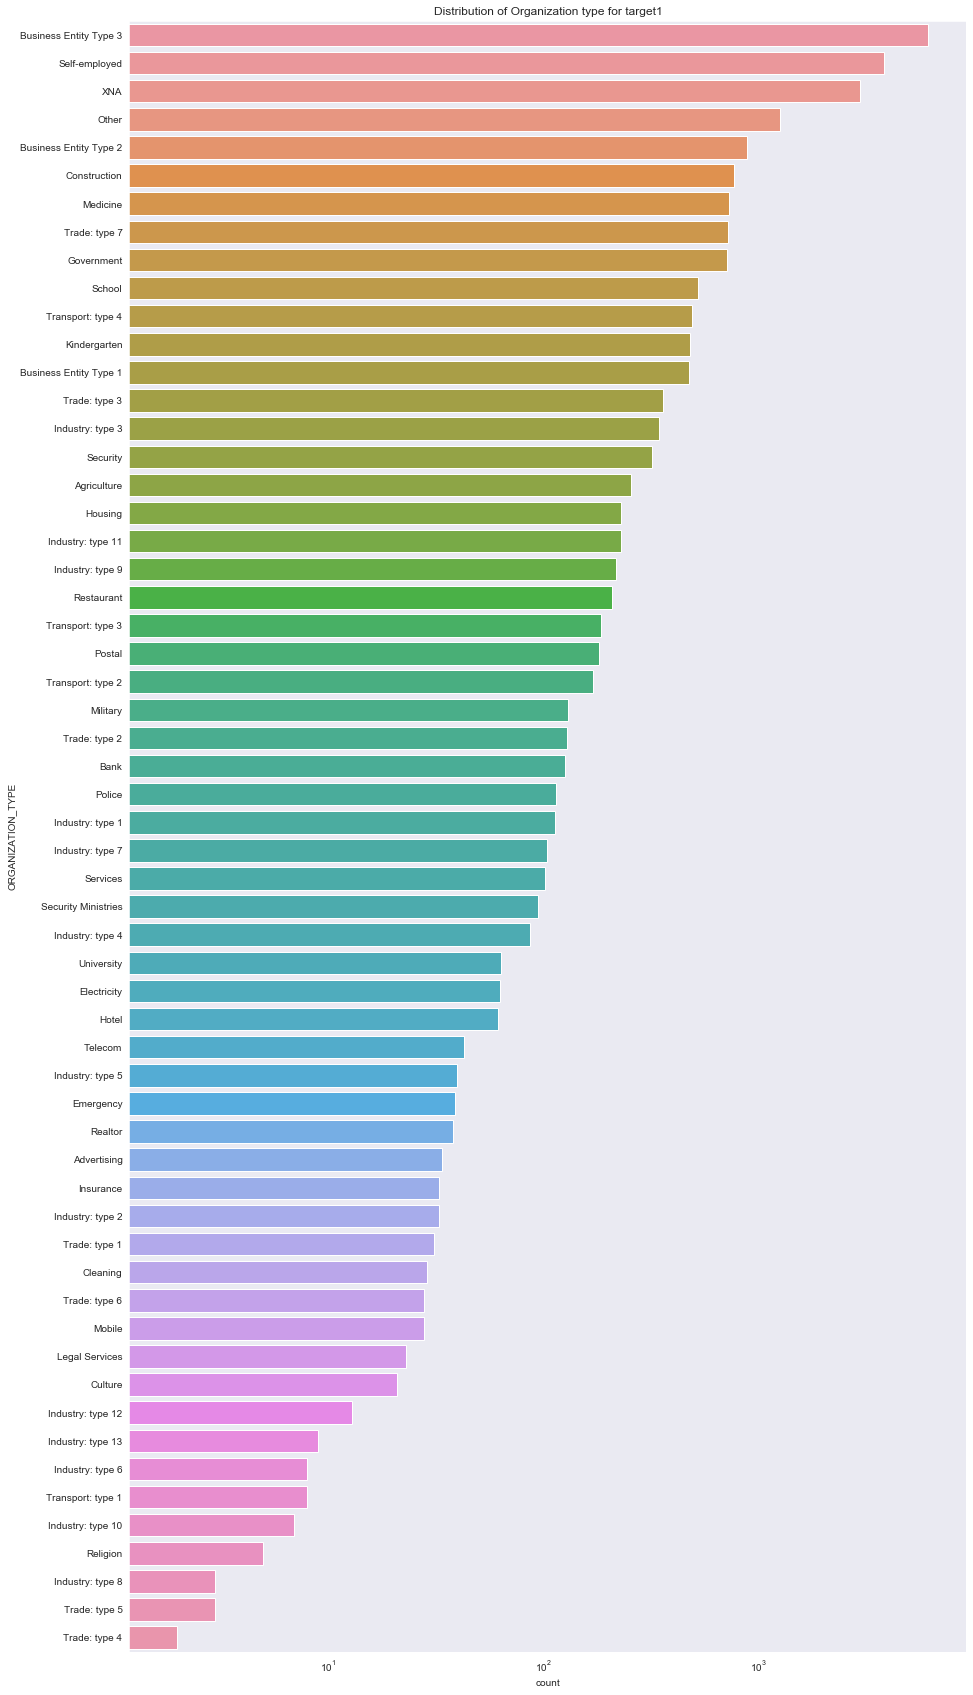

In [99]:
# Plotting for Organization type

sns.set_style('dark')
plt.figure(figsize=(15,30))

plt.title("Distribution of Organization type for target1")

plt.xscale('log')

sns.countplot(data=target1,y='ORGANIZATION_TYPE',order=target1['ORGANIZATION_TYPE'].value_counts().index)

plt.show()

In [100]:
# Clients applied for loan are mostly from Business Entity type 3 or self employed
# Clients applied for loan are less from Industry type 8,type 5 and type 4.

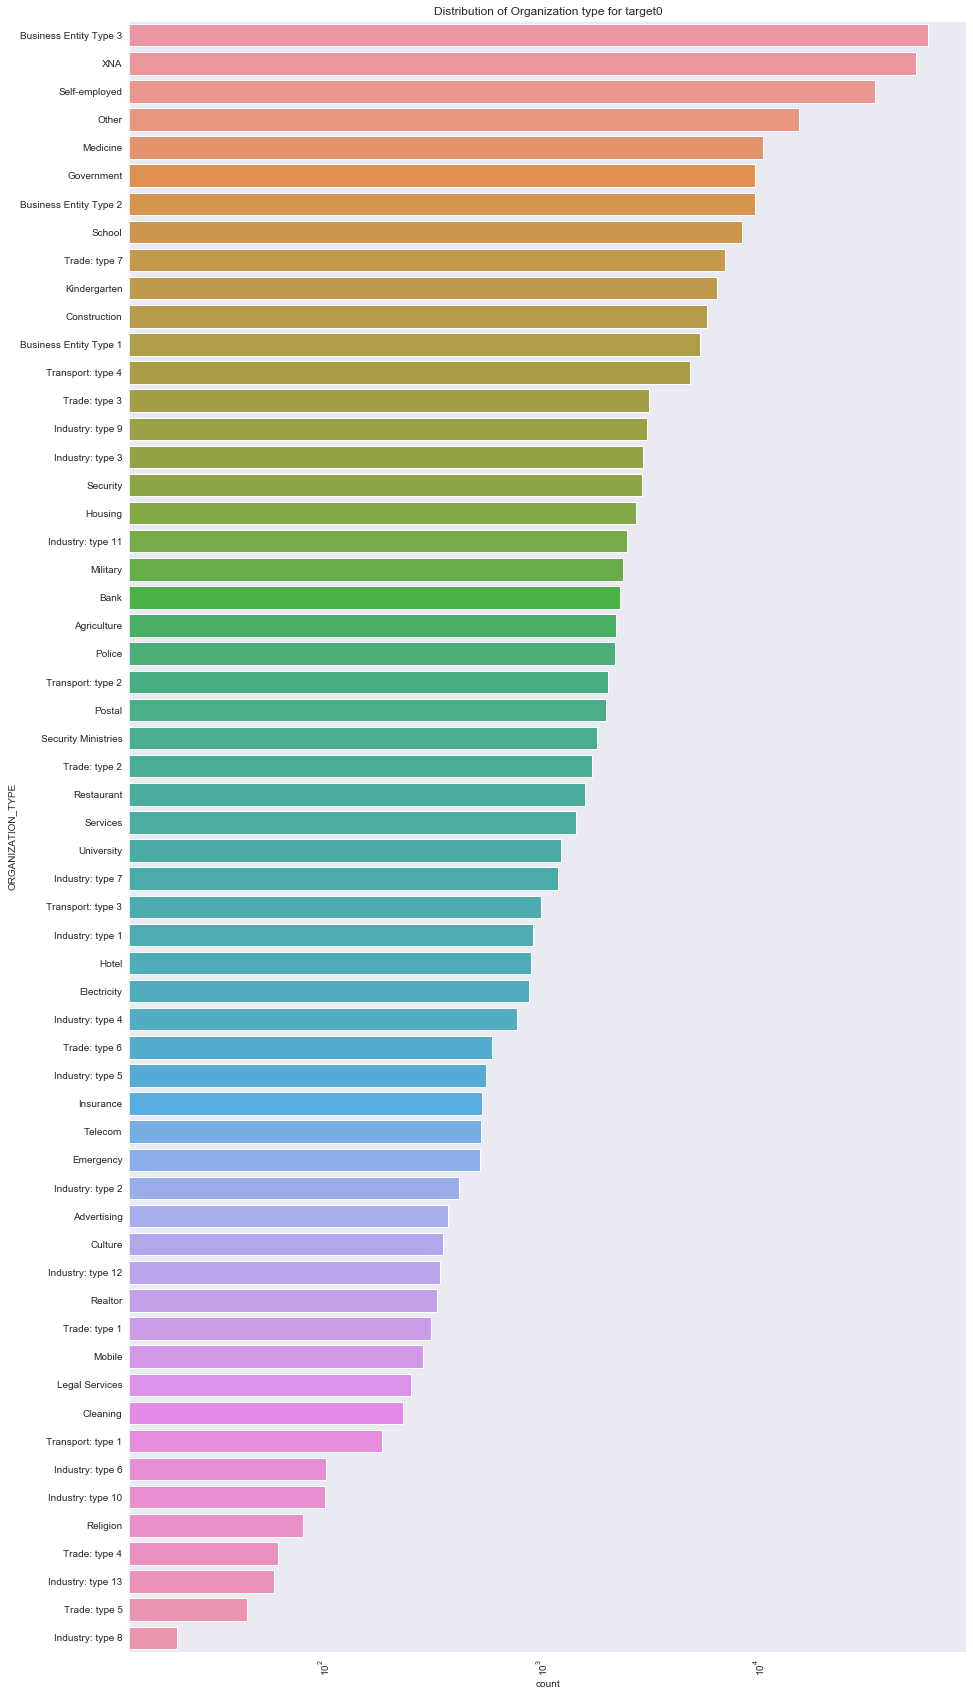

In [101]:
# Plotting for Organization type

sns.set_style('dark')
plt.figure(figsize=(15,30))

plt.title("Distribution of Organization type for target0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0,y='ORGANIZATION_TYPE',order=target0['ORGANIZATION_TYPE'].value_counts().index)

plt.show()

In [102]:
# Clients applied for loan are mostly from Business Entity type 3 or self employed
# Clients applied for loan are less from Industry type 8,type 5 and type 4.

#Finding  correlation for numerical columns for both case, i.e target0 and target1

In [103]:
# Finding some correlation for numerical columns for both target 0 and 1 

target0_corr=target0.iloc[0:,2:]

target1_corr=target1.iloc[0:,2:]

target_0=target0_corr.corr()
target_1=target1_corr.corr()

In [104]:
target_0.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,0.026957,0.002072,0.020287,-0.001768,-0.026070,-0.338976,-0.247011,-0.186982,0.027762,-0.005296,-0.013199,0.010496,0.016914,0.021233,0.073434,0.072000
AMT_INCOME_TOTAL,0.026957,1.000000,0.383185,0.453369,0.385450,0.168220,-0.086770,-0.178844,-0.074398,-0.032454,0.087680,0.077051,0.158748,0.147735,0.018549,0.036951,0.037962
AMT_CREDIT,0.002072,0.383185,1.000000,0.786802,0.986068,0.078897,0.048740,-0.066439,-0.008797,0.002026,0.047164,0.017475,0.042326,0.044740,-0.024633,-0.012037,0.006134
AMT_ANNUITY,0.020287,0.453369,0.786802,1.000000,0.785913,0.095466,-0.015287,-0.107333,-0.036258,-0.016476,0.046642,0.033892,0.070563,0.067615,-0.003580,0.008708,0.017128
AMT_GOODS_PRICE,-0.001768,0.385450,0.986068,0.785913,1.000000,0.081673,0.046093,-0.064754,-0.011052,0.004051,0.056540,0.019055,0.042955,0.044551,-0.024671,-0.013109,0.005006


In [105]:
target_1.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.006170,-0.002204,0.031548,-0.008610,-0.032624,-0.260548,-0.193616,-0.149310,0.029643,-0.023277,-0.024129,-0.019912,-0.010721,-0.000296,0.048121,0.054890
AMT_INCOME_TOTAL,-0.006170,1.000000,0.339093,0.414203,0.338123,0.109307,-0.004621,-0.120216,-0.037032,0.003717,0.078916,0.080687,0.158982,0.145215,0.008246,0.024008,0.028632
AMT_CREDIT,-0.002204,0.339093,1.000000,0.757027,0.981815,0.065693,0.135856,0.005254,0.026288,0.053402,0.029332,0.012051,0.026424,0.028241,-0.033407,-0.035753,-0.015043
AMT_ANNUITY,0.031548,0.414203,0.757027,1.000000,0.753163,0.061246,0.012320,-0.083400,-0.036806,0.015511,0.028687,0.031455,0.060318,0.057580,-0.006464,0.005869,0.014547
AMT_GOODS_PRICE,-0.008610,0.338123,0.981815,0.753163,1.000000,0.072814,0.136408,0.010236,0.026210,0.057564,0.042040,0.014714,0.029464,0.030465,-0.034732,-0.037208,-0.015240


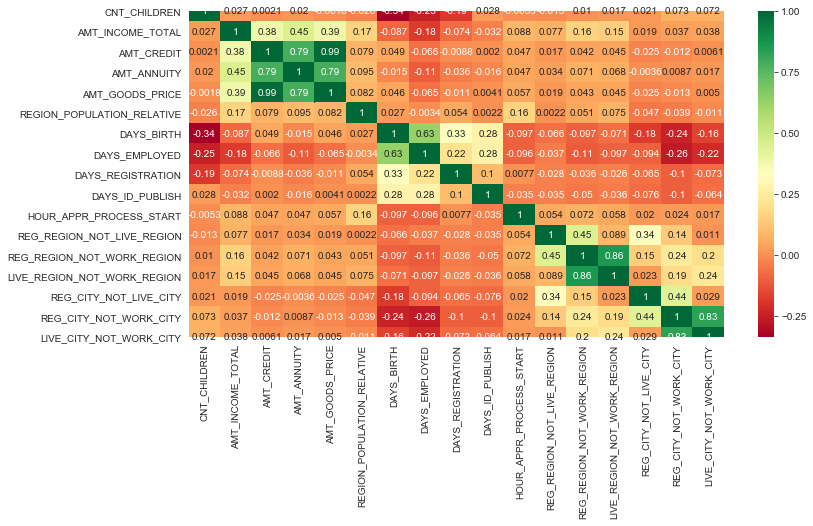

In [106]:
plt.figure(figsize=(12,6))
sns.heatmap(target_0, annot=True, cmap='RdYlGn');

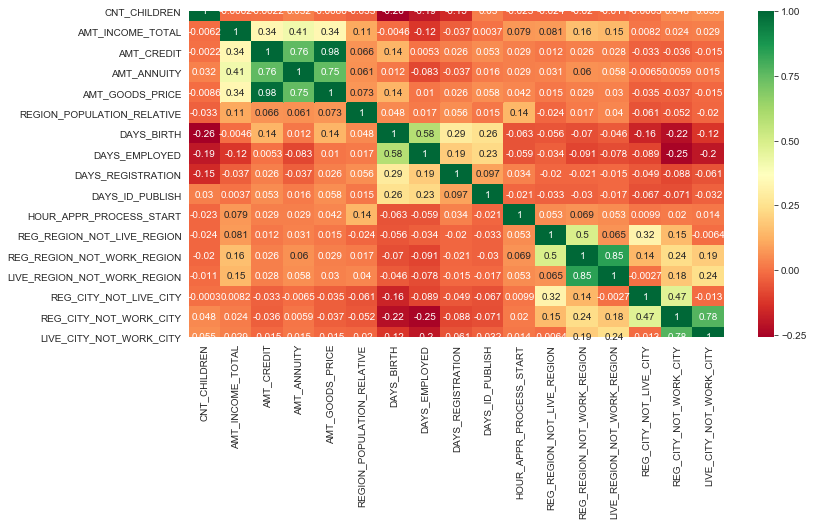

In [107]:
plt.figure(figsize=(12,6))
sns.heatmap(target_1, annot=True, cmap='RdYlGn');

In [108]:
# Details are not clear with heat map 

# we willapproach in a different way this analysis

In [109]:
#selecting int and float columns for correlation
cols_int=list(target0.select_dtypes('int64').columns)
cols_float=list(target0.select_dtypes('float').columns)
cols=cols_int+cols_float

ND_num = target0[cols]
ND_corr = ND_num.corr()
round(ND_corr, 2)

,SK_ID_CURR,TARGET,CNT_CHILDREN,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
SK_ID_CURR,1.0,NaN,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.0,NaN,1.00,-0.01,-0.01,0.01,0.02,0.02,0.07,0.07,0.03,0.00,0.02,-0.00,-0.03,-0.34,-0.25,-0.19,0.03
HOUR_APPR_PROCESS_START,-0.0,NaN,-0.01,1.00,0.05,0.07,0.06,0.02,0.02,0.02,0.09,0.05,0.05,0.06,0.16,-0.10,-0.10,0.01,-0.03
REG_REGION_NOT_LIVE_REGION,0.0,NaN,-0.01,0.05,1.00,0.45,0.09,0.34,0.14,0.01,0.08,0.02,0.03,0.02,0.00,-0.07,-0.04,-0.03,-0.03
REG_REGION_NOT_WORK_REGION,0.0,NaN,0.01,0.07,0.45,1.00,0.86,0.15,0.24,0.20,0.16,0.04,0.07,0.04,0.05,-0.10,-0.11,-0.04,-0.05
LIVE_REGION_NOT_WORK_REGION,0.0,NaN,0.02,0.06,0.09,0.86,1.00,0.02,0.19,0.24,0.15,0.04,0.07,0.04,0.07,-0.07,-0.10,-0.03,-0.04
REG_CITY_NOT_LIVE_CITY,-0.0,NaN,0.02,0.02,0.34,0.15,0.02,1.00,0.44,0.03,0.02,-0.02,-0.00,-0.02,-0.05,-0.18,-0.09,-0.06,-0.08
REG_CITY_NOT_WORK_CITY,-0.0,NaN,0.07,0.02,0.14,0.24,0.19,0.44,1.00,0.83,0.04,-0.01,0.01,-0.01,-0.04,-0.24,-0.26,-0.10,-0.10
LIVE_CITY_NOT_WORK_CITY,0.0,NaN,0.07,0.02,0.01,0.20,0.24,0.03,0.83,1.00,0.04,0.01,0.02,0.01,-0.01,-0.16,-0.22,-0.07,-0.06


In [110]:
Z = ND_corr.unstack()
Z.sort_values(ascending=False).drop_duplicates()

DAYS_ID_PUBLISH             DAYS_ID_PUBLISH                1.000000
AMT_CREDIT                  AMT_GOODS_PRICE                0.986068
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.862557
LIVE_CITY_NOT_WORK_CITY     REG_CITY_NOT_WORK_CITY         0.830130
AMT_CREDIT                  AMT_ANNUITY                    0.786802
                                                             ...   
REG_CITY_NOT_WORK_CITY      DAYS_BIRTH                    -0.244590
CNT_CHILDREN                DAYS_EMPLOYED                 -0.247011
DAYS_EMPLOYED               REG_CITY_NOT_WORK_CITY        -0.261127
CNT_CHILDREN                DAYS_BIRTH                    -0.338976
SK_ID_CURR                  TARGET                              NaN
Length: 155, dtype: float64

In [111]:
# Above data shows the 10 correlations for non default population

## Previous application Analysis

In [112]:
inp_pa.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
inp_pa.shape


(1670214, 37)

In [114]:
inp_pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [115]:
# listing the null values columns having more than 30%

nul_col =inp_pa.isnull().sum()
nul_col=nul_col[nul_col.values>(0.3*len(nul_col))]
len(nul_col)


15

In [116]:
# removing  null values columns 
nul_col = list(nul_col[nul_col.values>=0.3].index)
inp_pa.drop(labels=nul_col,axis=1,inplace=True)

inp_pa.shape

(1670214, 22)

In [117]:
# Combining columns of Application data and previous application data 

merge = pd.merge(inp_a1, inp_pa, how='left', on=['SK_ID_CURR'])

In [118]:
merge.shape

(1395591, 53)

In [119]:
merge.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,SK_ID_PREV,AMT_APPLICATION,AMT_CREDIT_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA
count,1.395591e+06,1.395591e+06,1.395591e+06,1.395591e+06,1.395591e+06,1.395591e+06,1.395591e+06,1.395591e+06,1.395591e+06,1.395591e+06,...,1.395591e+06,1.395591e+06,1.395591e+06,1.380402e+06,1.380402e+06,1.380401e+06,1.380402e+06,1.380402e+06,1.380402e+06,1.380402e+06
mean,2.784612e+05,8.678259e-02,4.020390e-01,1.656698e+05,5.773173e+05,2.627276e+04,5.178002e+05,2.058991e-02,4.470773e+01,2.011397e+02,...,7.387336e-02,2.226505e-01,1.741793e-01,1.922716e+06,1.719281e+05,1.929174e+05,1.246168e+01,9.964373e-01,-8.796226e+02,3.144947e+02
std,1.028129e+05,2.815163e-01,7.146876e-01,7.295070e+04,3.756803e+05,1.263205e+04,3.435952e+05,1.309880e-02,1.194881e+01,3.943261e+02,...,2.615648e-01,4.160257e-01,3.792637e-01,5.327097e+05,2.865358e+05,3.124593e+05,3.324106e+00,5.958221e-02,7.836291e+02,7.784817e+03
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,2.900000e-04,2.051781e+01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00
25%,1.892970e+05,0.000000e+00,0.000000e+00,1.125000e+05,2.700000e+05,1.658700e+04,2.385000e+05,1.003200e-02,3.482877e+01,2.827397e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.461439e+06,1.971000e+04,2.471850e+04,1.000000e+01,1.000000e+00,-1.312000e+03,-1.000000e+00
50%,2.789960e+05,0.000000e+00,0.000000e+00,1.575000e+05,4.995000e+05,2.459250e+04,4.500000e+05,1.885000e-02,4.394521e+01,6.561644e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.922615e+06,6.982650e+04,7.950600e+04,1.200000e+01,1.000000e+00,-5.810000e+02,4.000000e+00
75%,3.674840e+05,0.000000e+00,1.000000e+00,2.025000e+05,7.871310e+05,3.371850e+04,6.750000e+05,2.639200e-02,5.477808e+01,1.752329e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,2.384073e+06,1.800000e+05,2.096415e+05,1.500000e+01,1.000000e+00,-2.700000e+02,8.500000e+01
max,4.562550e+05,1.000000e+00,1.900000e+01,4.455000e+05,2.700000e+06,6.998850e+04,2.700000e+06,7.250800e-02,6.904384e+01,1.000666e+03,...,1.000000e+00,1.000000e+00,1.000000e+00,2.845381e+06,4.455000e+06,4.104351e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06


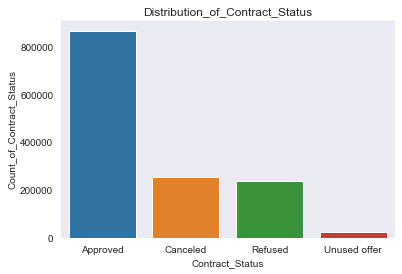

In [120]:
sns.countplot(merge.NAME_CONTRACT_STATUS)
plt.xlabel("Contract_Status")
plt.ylabel("Count_of_Contract_Status")
plt.title("Distribution_of_Contract_Status")
plt.show()


In [121]:
merge['NAME_CONTRACT_STATUS'].value_counts()*100/len(merge)

Approved        62.029635
Canceled        18.145073
Refused         17.136898
Unused offer     1.600039
Name: NAME_CONTRACT_STATUS, dtype: float64

In [122]:
#Segmenting  new dataframe into 4 parts based on the contract status, i.e: Approved,Canceled,Refused, Unused
Approved = merge[merge.NAME_CONTRACT_STATUS=='Approved']
Canceled = merge[merge.NAME_CONTRACT_STATUS=='Canceled']
Refused = merge[merge.NAME_CONTRACT_STATUS=='Refused']
Unused = merge[merge.NAME_CONTRACT_STATUS=='Unused offer']

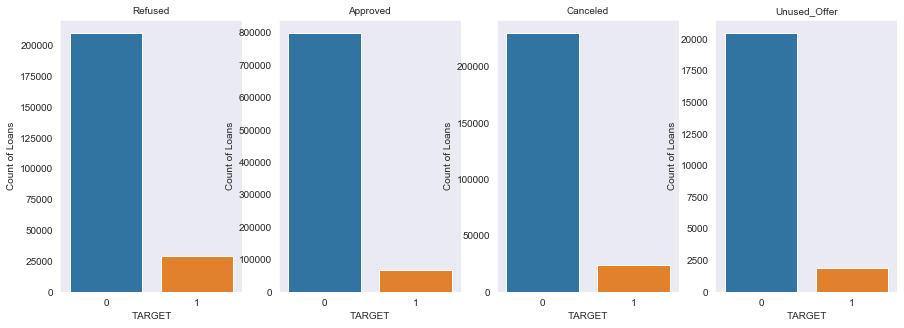

In [123]:

def plot_func(var):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(15,5))
    
    s1=sns.countplot(ax=ax1,x=Refused[var], data=Refused, order= Refused[var].value_counts().index,)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    s1.set_xticklabels(s1.get_xticklabels())
    
    s2=sns.countplot(ax=ax2,x=Approved[var], data=Approved, order= Approved[var].value_counts().index,)
    s2.set_xticklabels(s2.get_xticklabels())
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title("Approved", fontsize=10)
    
    
    s3=sns.countplot(ax=ax3,x=Canceled[var], data=Canceled, order= Canceled[var].value_counts().index,)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel('%s' %var)
    ax3.set_ylabel("Count of Loans")
    s3.set_xticklabels(s3.get_xticklabels())
    
    s4=sns.countplot(ax=ax4,x=Unused[var], data=Unused, order= Unused[var].value_counts().index,)
    ax4.set_title("Unused_Offer", fontsize=10)
    ax4.set_xlabel('%s' %var)
    ax4.set_ylabel("Count of Loans")
    s4.set_xticklabels(s3.get_xticklabels())
    
    
    
    
    
    
plot_func('TARGET')

In [124]:
Refused.TARGET.value_counts(normalize=True)

0    0.879495
1    0.120505
Name: TARGET, dtype: float64

In [125]:
Approved.TARGET.value_counts(normalize=True)

0    0.923611
1    0.076389
Name: TARGET, dtype: float64

In [126]:
Canceled.TARGET.value_counts(normalize=True)

0    0.907693
1    0.092307
Name: TARGET, dtype: float64

In [127]:
Unused.TARGET.value_counts(normalize=True)

0    0.917376
1    0.082624
Name: TARGET, dtype: float64

In [128]:
#Loans which were previously refused,cancelled,approved,un unsed have a higher default rate

In [129]:
# Renaming the column names after merging

merge_a = merge.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)


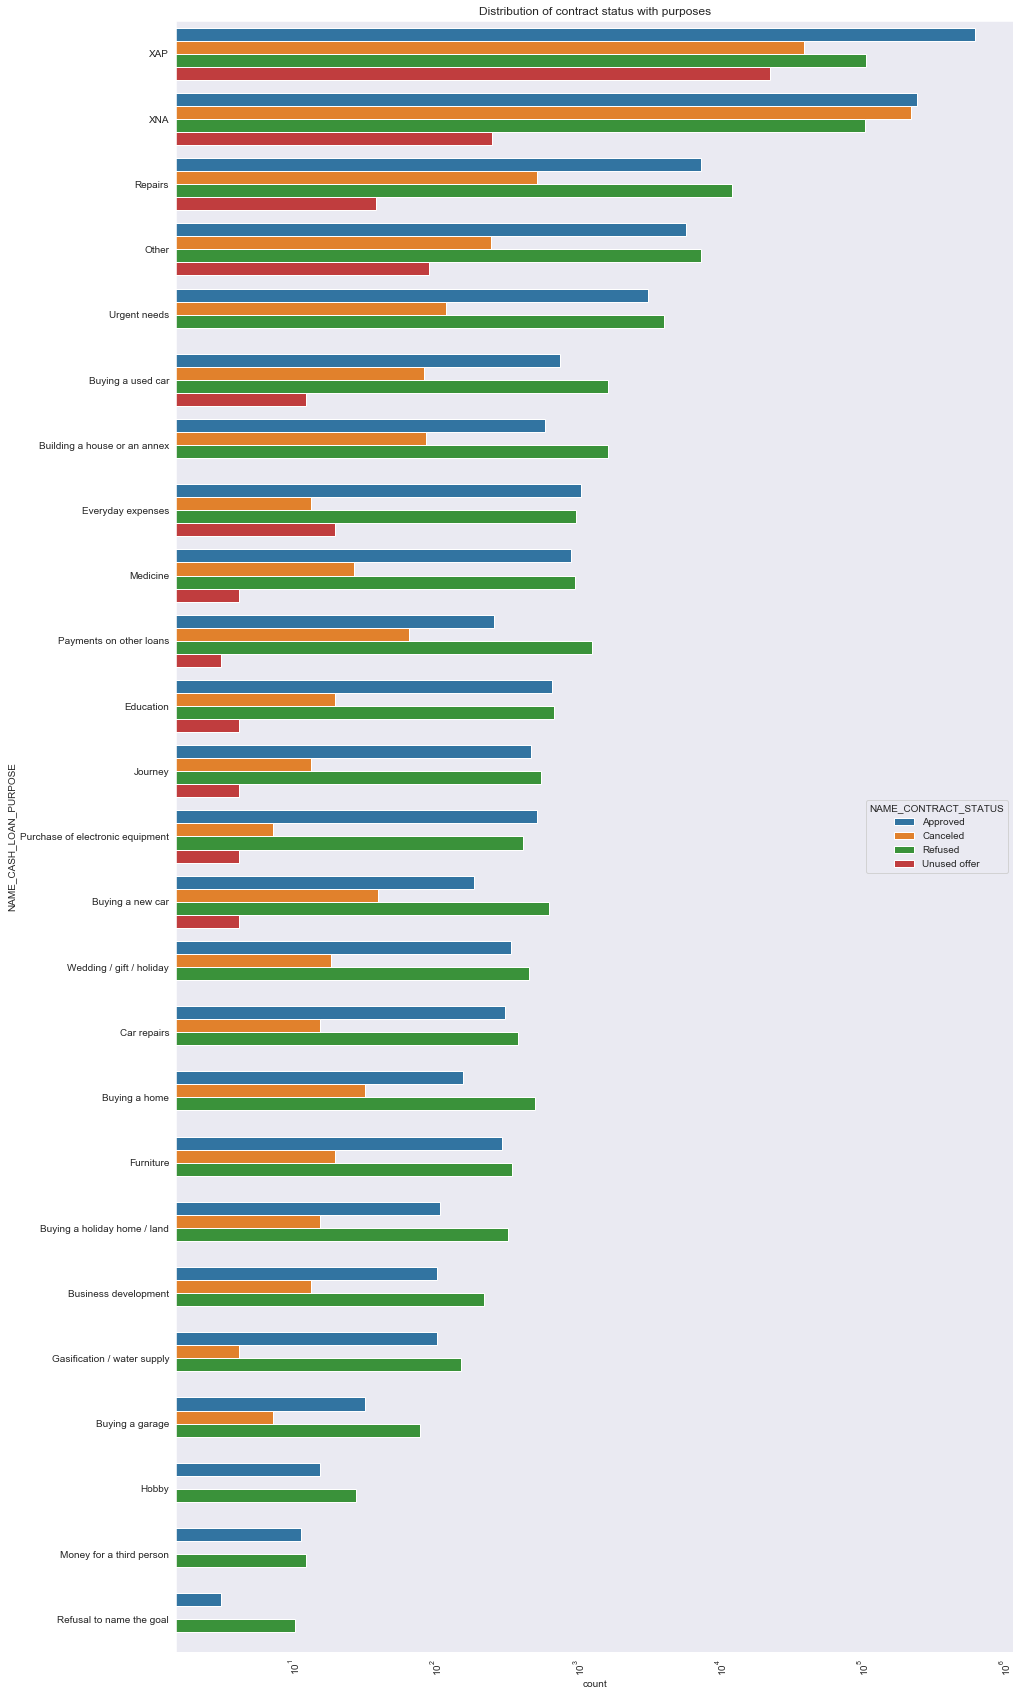

In [130]:
# Distribution of contract status in logarithmic scale


plt.figure(figsize=(15,30))

plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = merge_a, y= 'NAME_CASH_LOAN_PURPOSE', 
            order=merge_a['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue= 'NAME_CONTRACT_STATUS') 

In [131]:
#Neglecting the XAP, XNA part we can conclude from the graph that
#1.Repairs, others, urgent needs etc have high refusal rate
#2.Hobby, Money_for_a_third_person, Refusal_to name_the goal always uses offers 

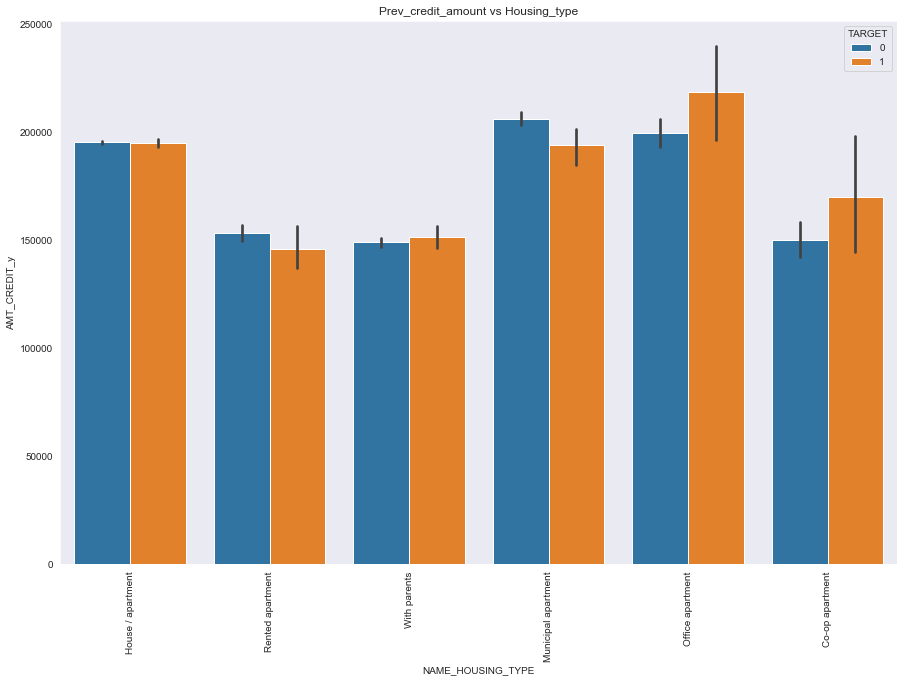

In [132]:
# Box plotting for Credit amount prev vs Housing 
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(data =merge_a, y='AMT_CREDIT_y',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev_credit_amount vs Housing_type')
plt.show()

In [133]:
# from the above graph we can conclude that bank should avoid giving 
#loans to the housing type of co-op apartment as they are having difficulties in payment. 
#Bank should focus on housing type with parents or House\apartment or muncipal apartment for successful payments

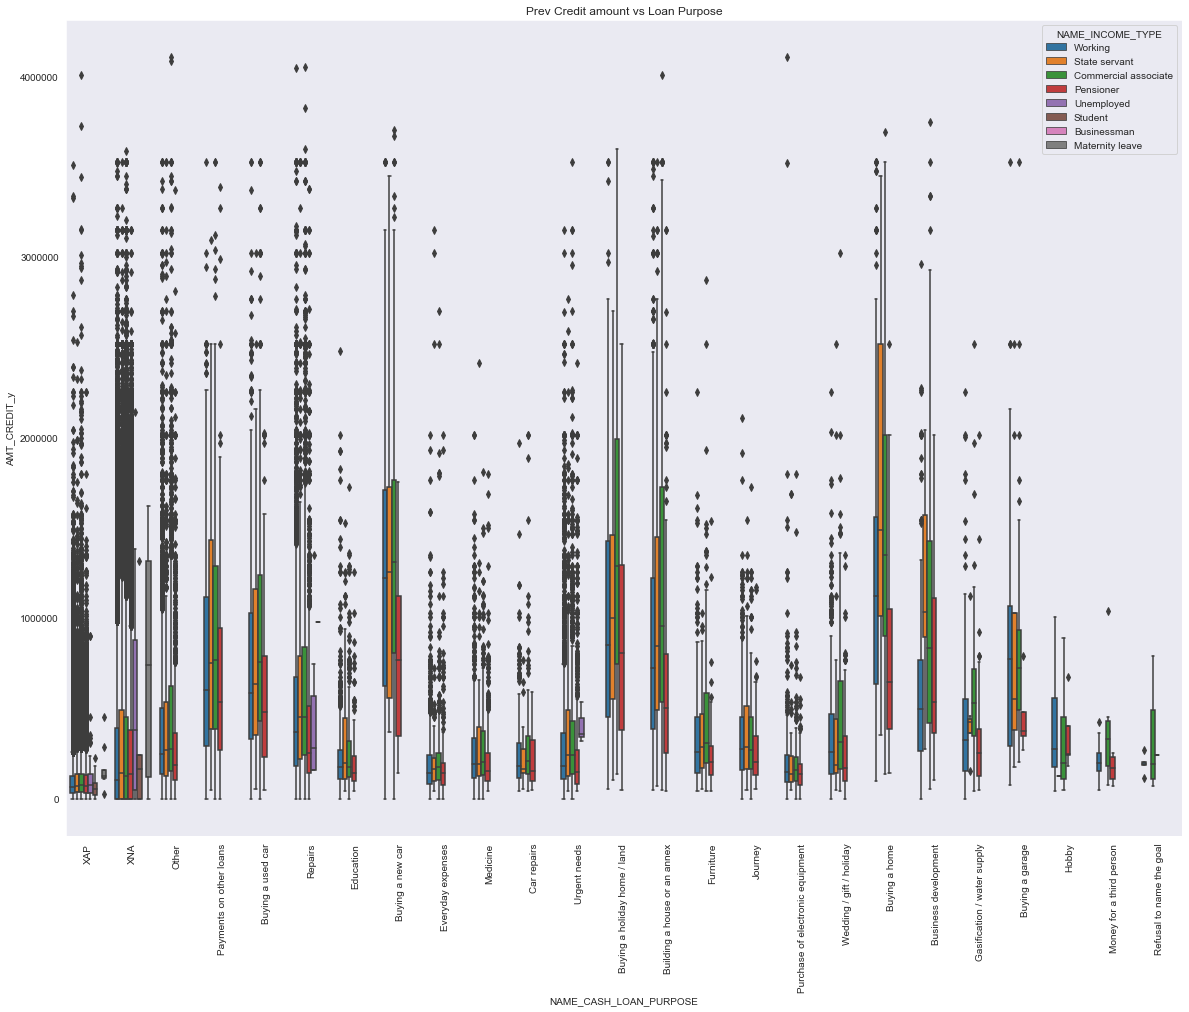

In [134]:
# Box plotting for Credit amount

plt.figure(figsize=(20,15))
plt.xticks(rotation=90)
sns.boxplot(data =merge_a, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_y',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

In [135]:
# From the graph we can conclude that  hobby, Money for third person, refusal to name the goal is less credit applied.
# For Buying a new car, Buying a home, Buying holiday home credit amount of loan is higher